In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Load the data
df = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv", header=0)
print(df.columns)

df.dropna(subset=['isFraud'], inplace=True)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


DATA PREPROCESSING

In [ ]:
# Fill missing values in numeric columns with mean
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Label encode all object/categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

In [ ]:
# Downcast numeric types
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    else:
        df[col] = pd.to_numeric(df[col], downcast='integer')

# Separate features and target
X = df.drop(columns=['isFraud']).values.astype(np.float32)
y = df['isFraud'].values.astype(np.float32).reshape(-1, 1)

In [ ]:
# Normalize features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0) + 1e-6
X = (X - X_mean) / X_std

# Train/Validation split
def train_val_split(X, y, test_size=0.2, seed=42):
    np.random.seed(seed)
    idx = np.random.permutation(len(X))
    split = int(len(X) * (1 - test_size))
    return X[idx[:split]], X[idx[split:]], y[idx[:split]], y[idx[split:]]

X_train, X_val, y_train, y_val = train_val_split(X, y)

# Summary
print(f"\n✅ Preprocessing Complete.")
print(f"Train Set: {X_train.shape}, Validation Set: {X_val.shape}")



✅ Preprocessing Complete.
Train Set: (1984143, 10), Validation Set: (496036, 10)


In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,66964,170136.0,160296.36,148976,0.0,0.0,0.0,0.0
1,1,3,1864.28,192565,21249.0,19384.72,155153,0.0,0.0,0.0,0.0
2,1,4,181.00,88192,181.0,0.00,41649,0.0,0.0,1.0,0.0
3,1,1,181.00,512995,181.0,0.00,37100,21182.0,0.0,1.0,0.0
4,1,3,11668.14,302602,41554.0,29885.86,76455,0.0,0.0,0.0,0.0


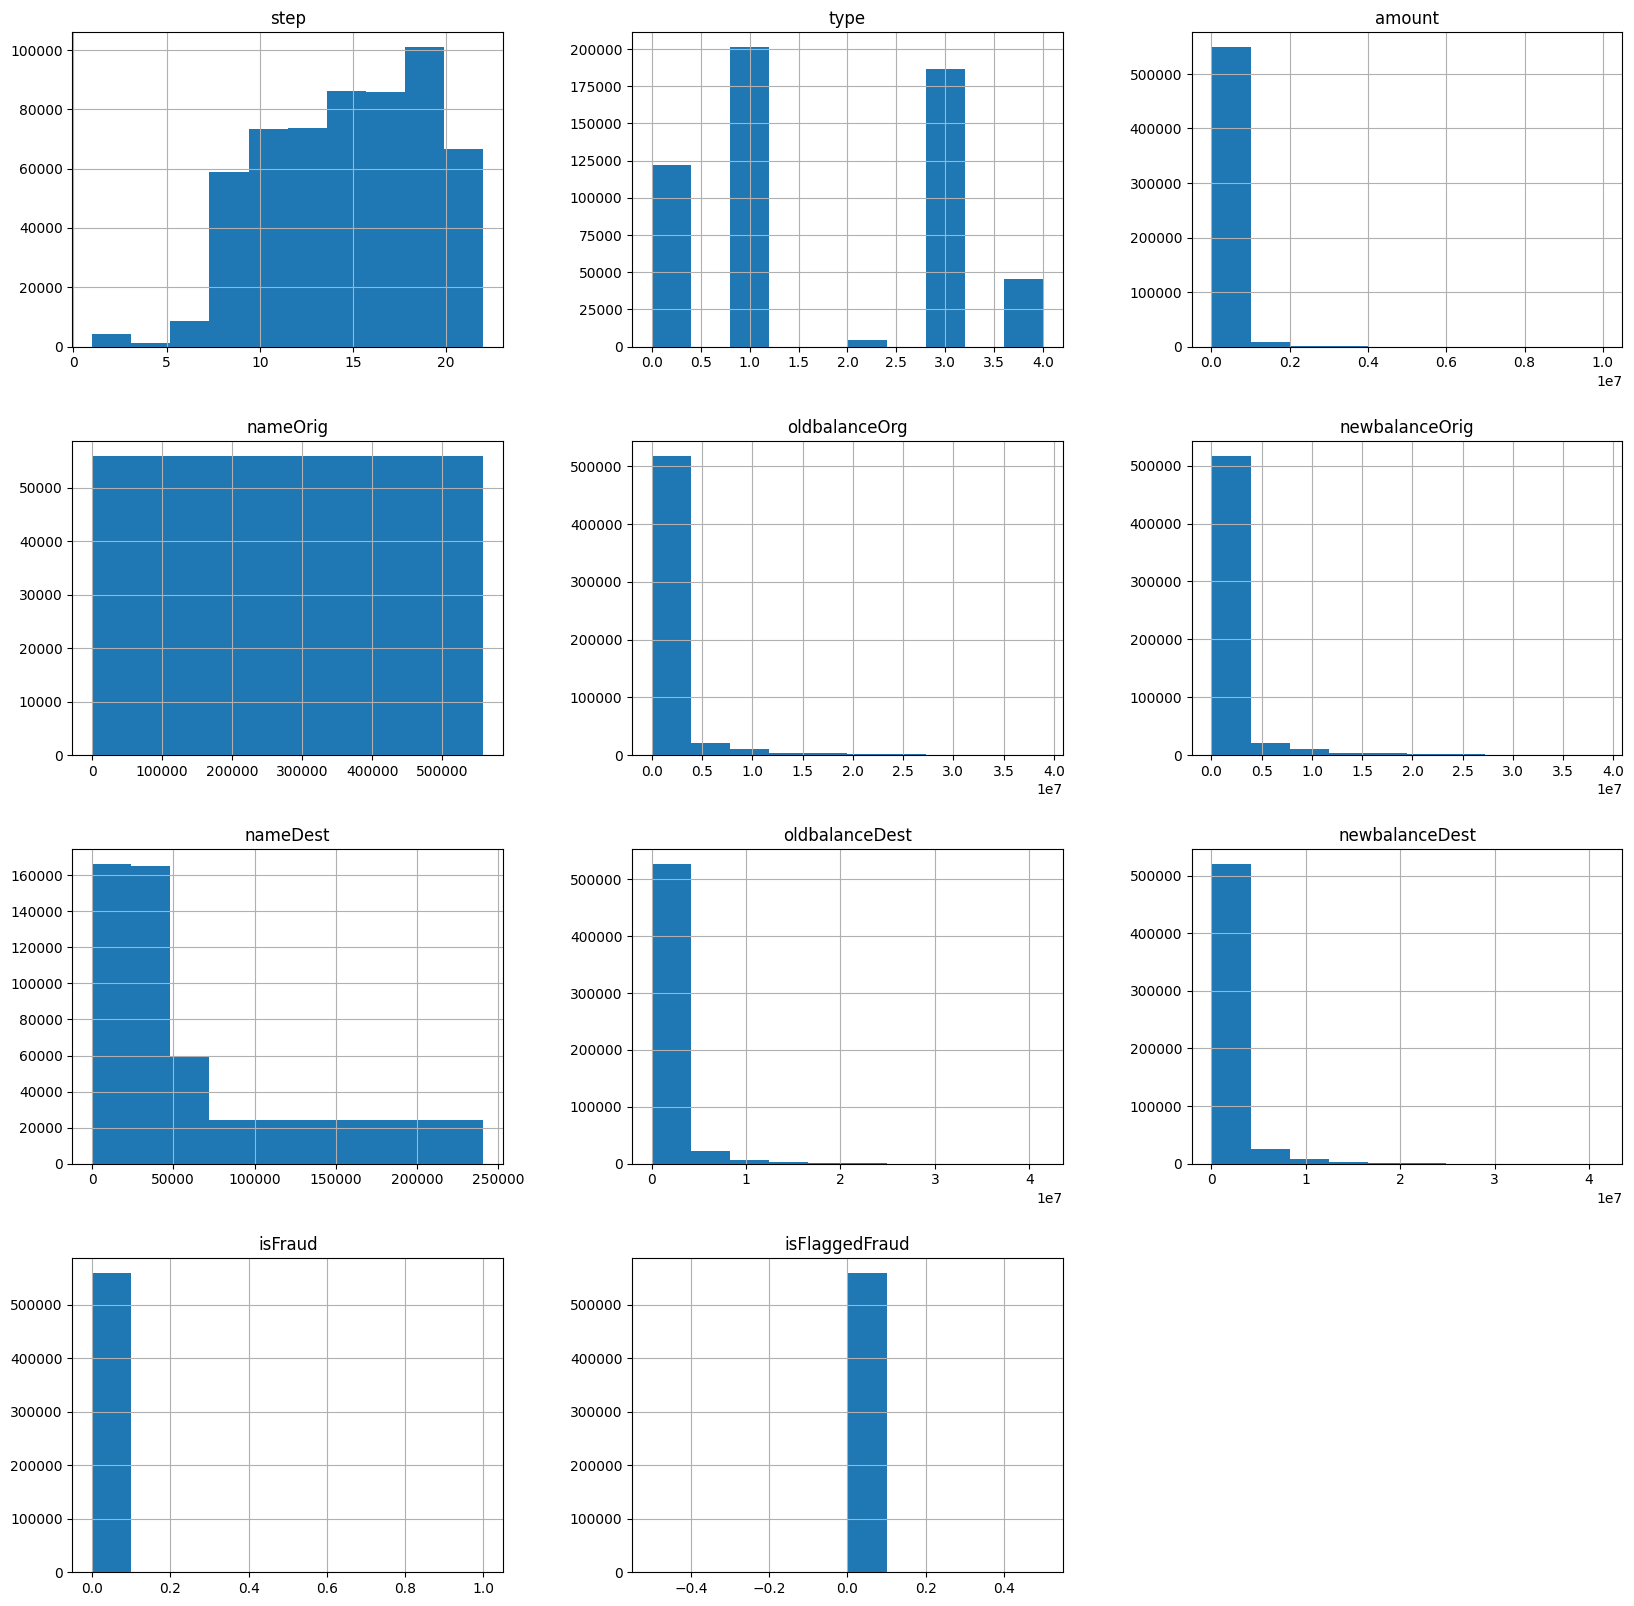

In [ ]:
# Visulization
import matplotlib.pyplot as plt
df.hist(figsize=(20,20))
plt.show()

HYPER-PARAMETER-1

In [ ]:
#Model 1
import numpy as np
import matplotlib.pyplot as plt

# MLP Model Parameters
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
learning_rate = 0.001
epochs = 20
batch_size = 512
patience = 10

W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
m_W1, v_W1 = np.zeros_like(W1), np.zeros_like(W1)
m_b1, v_b1 = np.zeros_like(b1), np.zeros_like(b1)
m_W2, v_W2 = np.zeros_like(W2), np.zeros_like(W2)
m_b2, v_b2 = np.zeros_like(b2), np.zeros_like(b2)

# Activation Functions
def sigmoid(z): return 1 / (1 + np.exp(-z))
def relu(z): return np.maximum(0, z)
def relu_deriv(z): return (z > 0).astype(np.float32)

def compute_loss(y_hat, y, class_weights=None):
    y_hat = np.clip(y_hat, 1e-8, 1 - 1e-8)
    if class_weights is None:
        return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    else:

        return -np.mean(class_weights[0] * y * np.log(y_hat) + class_weights[1] * (1 - y) * np.log(1 - y_hat))


Epoch 1/20: Train Loss = 2.4906, Val Loss = 1.8713
Epoch 2/20: Train Loss = 1.9199, Val Loss = 1.6336
Epoch 3/20: Train Loss = 1.7039, Val Loss = 1.3860
Epoch 4/20: Train Loss = 1.5402, Val Loss = 1.3171
Epoch 5/20: Train Loss = 1.4225, Val Loss = 1.2601
Epoch 6/20: Train Loss = 1.3403, Val Loss = 1.0507
Epoch 7/20: Train Loss = 1.2695, Val Loss = 0.9997
Epoch 8/20: Train Loss = 1.2155, Val Loss = 1.0507
Epoch 9/20: Train Loss = 1.1711, Val Loss = 1.0436
Epoch 10/20: Train Loss = 1.1395, Val Loss = 1.0466
Epoch 11/20: Train Loss = 1.1085, Val Loss = 0.9484
Epoch 12/20: Train Loss = 1.0788, Val Loss = 0.8626
Epoch 13/20: Train Loss = 1.0664, Val Loss = 0.9672
Epoch 14/20: Train Loss = 1.0520, Val Loss = 0.9383
Epoch 15/20: Train Loss = 1.0373, Val Loss = 0.8753
Epoch 16/20: Train Loss = 1.0215, Val Loss = 0.9406
Epoch 17/20: Train Loss = 1.0106, Val Loss = 0.9388
Epoch 18/20: Train Loss = 1.0077, Val Loss = 0.9799
Epoch 19/20: Train Loss = 0.9966, Val Loss = 0.9022
Epoch 20/20: Train Lo

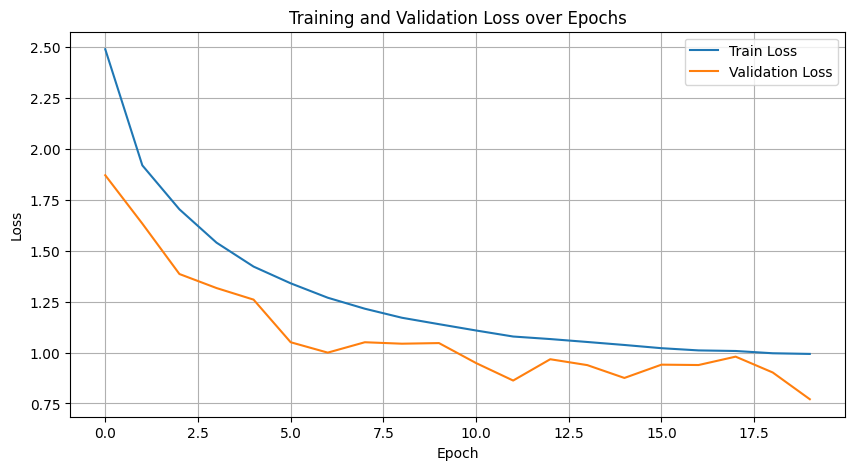

In [ ]:
# Forward propagation
def forward(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

# Backward propagation
def backward(X, y, Z1, A1, A2):
    m = X.shape[0]
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_deriv(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2

def adam_update(m, v, grad, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * np.square(grad)
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
    param_update = learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
    return param_update, m, v

class_weights = [len(y_train) / (2 * np.sum(y_train == 1)), len(y_train) / (2 * np.sum(y_train == 0))]

best_val_loss = float('inf')
patience_counter = 0
best_weights = None

# Training Loop
train_losses = []
val_losses = []

for epoch in range(epochs):

    perm = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[perm]
    y_train_shuffled = y_train[perm]

    epoch_loss = 0
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i + batch_size]
        y_batch = y_train_shuffled[i:i + batch_size]

        Z1, A1, Z2, A2 = forward(X_batch)
        loss = compute_loss(A2, y_batch, class_weights)
        epoch_loss += loss * len(X_batch)

        dW1, db1, dW2, db2 = backward(X_batch, y_batch, Z1, A1, A2)

        t = epoch * (X_train.shape[0] // batch_size) + (i // batch_size) + 1
        W1_update, m_W1, v_W1 = adam_update(m_W1, v_W1, dW1, t)
        b1_update, m_b1, v_b1 = adam_update(m_b1, v_b1, db1, t)
        W2_update, m_W2, v_W2 = adam_update(m_W2, v_W2, dW2, t)
        b2_update, m_b2, v_b2 = adam_update(m_b2, v_b2, db2, t)


        W1 -= W1_update
        b1 -= b1_update
        W2 -= W2_update
        b2 -= b2_update

    epoch_loss /= X_train.shape[0]
    _, _, _, A2_val = forward(X_val)
    val_loss = compute_loss(A2_val, y_val, class_weights)

    train_losses.append(epoch_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch + 1}/{epochs}: Train Loss = {epoch_loss:.4f}, Val Loss = {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy())
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch + 1}. Validation loss did not improve for {patience} epochs.")
            break

if best_weights is not None:
    W1, b1, W2, b2 = best_weights

# Plot Training vs Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    495589
         1.0       0.91      0.56      0.70       447

    accuracy                           1.00    496036
   macro avg       0.95      0.78      0.85    496036
weighted avg       1.00      1.00      1.00    496036

Accuracy: 0.9996


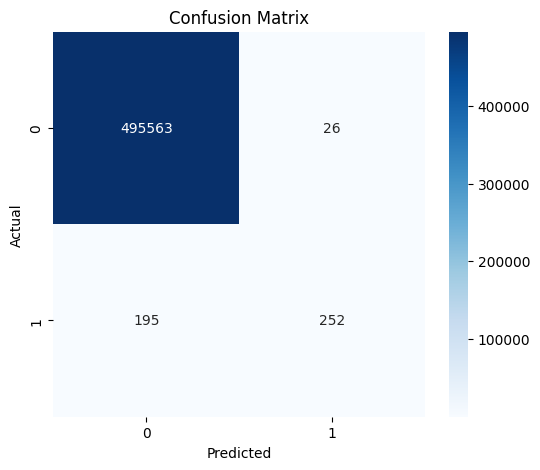

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

def predict(X):
    _, _, _, A2 = forward(X)
    return (A2 > 0.5).astype(int)

y_pred = predict(X_val)

print("Classification Report:")
print(classification_report(y_val, y_pred))

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


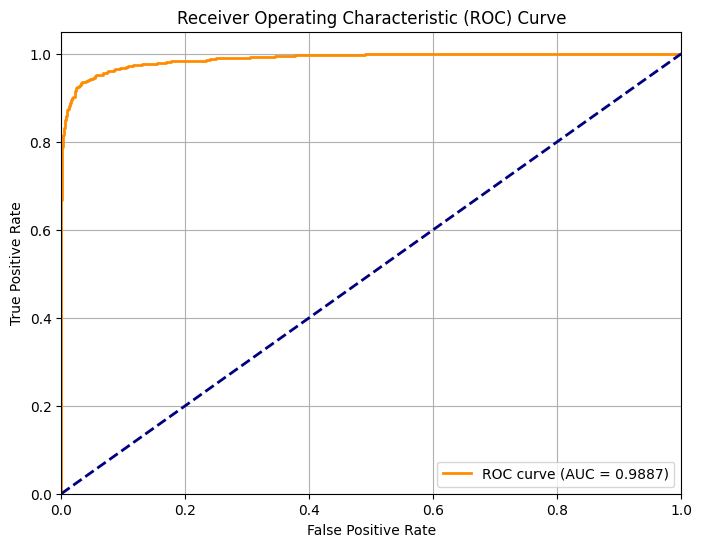

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

_, _, _, A2_val = forward(X_val)
y_scores = A2_val.ravel()
fpr, tpr, thresholds = roc_curve(y_val, y_scores)
roc_auc = roc_auc_score(y_val, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


HYPER-PARAMETER-**2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# MLP Model Parameters
input_size1 = X_train.shape[1]
hidden_size1 = 64
output_size1 = 1
learning_rate1 = 0.002
epochs1 = 40
batch_size1 = 512
patience1 = 10

# Initialize weights
W1 = np.random.randn(input_size1, hidden_size1) * 0.01
b1 = np.zeros((1, hidden_size1))
W2 = np.random.randn(hidden_size1, output_size1) * 0.01
b2 = np.zeros((1, output_size1))

# Adam optimizer params
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
m_W1, v_W1 = np.zeros_like(W1), np.zeros_like(W1)
m_b1, v_b1 = np.zeros_like(b1), np.zeros_like(b1)
m_W2, v_W2 = np.zeros_like(W2), np.zeros_like(W2)
m_b2, v_b2 = np.zeros_like(b2), np.zeros_like(b2)

# Activation Functions
def sigmoid(z): return 1 / (1 + np.exp(-z))
def relu(z): return np.maximum(0, z)
def relu_deriv(z): return (z > 0).astype(np.float32)

# Loss function
def compute_loss(y_hat, y, class_weights=None):
    y_hat = np.clip(y_hat, 1e-8, 1 - 1e-8)
    if class_weights is None:
        return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    else:
        return -np.mean(class_weights[0] * y * np.log(y_hat) + class_weights[1] * (1 - y) * np.log(1 - y_hat))


Epoch 1/40: Train Loss = 2.3048, Val Loss = 1.7439
Epoch 2/40: Train Loss = 1.7222, Val Loss = 1.4543
Epoch 3/40: Train Loss = 1.4496, Val Loss = 1.3214
Epoch 4/40: Train Loss = 1.2850, Val Loss = 1.2567
Epoch 5/40: Train Loss = 1.2007, Val Loss = 0.9543
Epoch 6/40: Train Loss = 1.1536, Val Loss = 1.0187
Epoch 7/40: Train Loss = 1.1119, Val Loss = 1.0600
Epoch 8/40: Train Loss = 1.0903, Val Loss = 1.0375
Epoch 9/40: Train Loss = 1.0648, Val Loss = 0.8945
Epoch 10/40: Train Loss = 1.0499, Val Loss = 0.8780
Epoch 11/40: Train Loss = 1.0393, Val Loss = 1.0549
Epoch 12/40: Train Loss = 1.0332, Val Loss = 0.8988
Epoch 13/40: Train Loss = 1.0134, Val Loss = 0.9989
Epoch 14/40: Train Loss = 1.0087, Val Loss = 0.8903
Epoch 15/40: Train Loss = 1.0044, Val Loss = 0.9123
Epoch 16/40: Train Loss = 0.9934, Val Loss = 0.8316
Epoch 17/40: Train Loss = 0.9784, Val Loss = 0.6819
Epoch 18/40: Train Loss = 0.9732, Val Loss = 0.9995
Epoch 19/40: Train Loss = 0.9661, Val Loss = 0.8902
Epoch 20/40: Train Lo

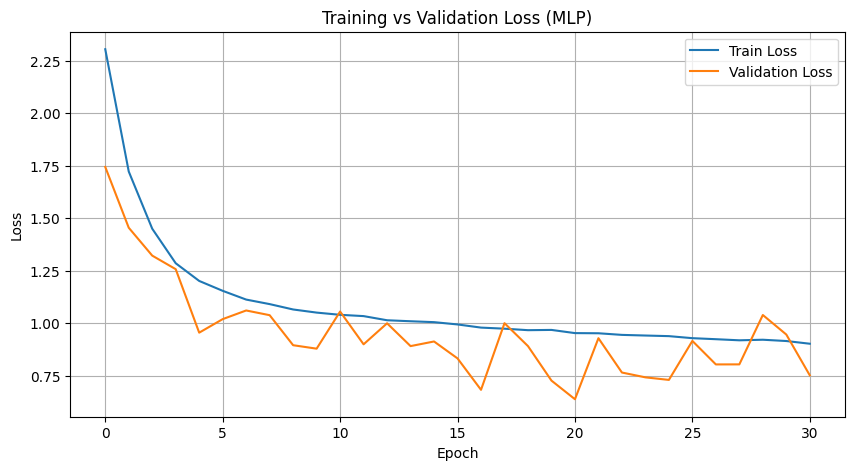

In [ ]:
# Forward propagation
def forward(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

# Backward propagation
def backward(X, y, Z1, A1, A2):
    m = X.shape[0]
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_deriv(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2

# Adam update step
def adam_update(m, v, grad, t, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * (grad ** 2)
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
    update = learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
    return update, m, v

# Class weights
class_weights = [
    len(y_train) / (2 * np.sum(y_train == 1)),
    len(y_train) / (2 * np.sum(y_train == 0))
]

# Early Stopping Variables
best_val_loss = float('inf')
patience_counter = 0
best_weights = None

# Training Loop
train_losses = []
val_losses = []

for epoch in range(epochs1):
    perm = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[perm]
    y_train_shuffled = y_train[perm]

    epoch_loss = 0
    for i in range(0, X_train.shape[0], batch_size1):
        X_batch = X_train_shuffled[i:i + batch_size1]
        y_batch = y_train_shuffled[i:i + batch_size1]

        Z1, A1, Z2, A2 = forward(X_batch)
        loss = compute_loss(A2, y_batch, class_weights)
        epoch_loss += loss * len(X_batch)

        dW1, db1, dW2, db2 = backward(X_batch, y_batch, Z1, A1, A2)

        t = epoch * (X_train.shape[0] // batch_size1) + (i // batch_size1) + 1
        W1_update, m_W1, v_W1 = adam_update(m_W1, v_W1, dW1, t, learning_rate1)
        b1_update, m_b1, v_b1 = adam_update(m_b1, v_b1, db1, t, learning_rate1)
        W2_update, m_W2, v_W2 = adam_update(m_W2, v_W2, dW2, t, learning_rate1)
        b2_update, m_b2, v_b2 = adam_update(m_b2, v_b2, db2, t, learning_rate1)

        W1 -= W1_update
        b1 -= b1_update
        W2 -= W2_update
        b2 -= b2_update

    epoch_loss /= X_train.shape[0]

    # Validation
    _, _, _, A2_val = forward(X_val)
    val_loss = compute_loss(A2_val, y_val, class_weights)

    train_losses.append(epoch_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch + 1}/{epochs1}: Train Loss = {epoch_loss:.4f}, Val Loss = {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy())
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience1:
            print(f"Early stopping at epoch {epoch + 1}. No improvement for {patience1} epochs.")
            break

# Restore best weights
if best_weights is not None:
    W1, b1, W2, b2 = best_weights

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (MLP)')
plt.legend()
plt.grid(True)
plt.show()

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    495589
         1.0       0.95      0.64      0.77       447

    accuracy                           1.00    496036
   macro avg       0.98      0.82      0.88    496036
weighted avg       1.00      1.00      1.00    496036

Accuracy: 0.9996


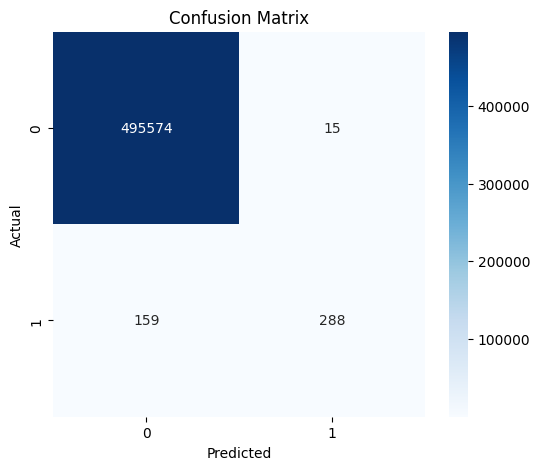

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
def predict(X):
    _, _, _, A2 = forward(X)
    return (A2 > 0.5).astype(int)

y_pred = predict(X_val)

print("Classification Report:")
print(classification_report(y_val, y_pred))

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


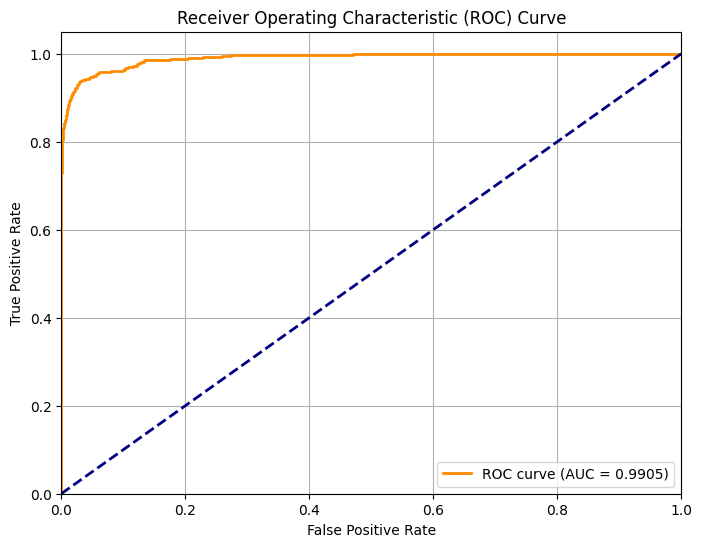

In [ ]:
#AUC-ROC FOR HYPER PARAMETER 2
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
_, _, _, A2_val = forward(X_val)
y_scores = A2_val.ravel()

fpr, tpr, thresholds = roc_curve(y_val, y_scores)
roc_auc = roc_auc_score(y_val, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
